In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

Boston Housing Dataset Attribute Information (in order):

CRIM : per capita crime rate by town ZN : proportion of residential land zoned for lots over 25,000 sq.ft. INDUS : proportion of non-retail business acres per town CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) NOX : nitric oxides concentration (parts per 10 million) RM : average number of rooms per dwelling AGE : proportion of owner-occupied units built prior to 1940 DIS : weighted distances to five Boston employment centres RAD : index of accessibility to radial highways TAX : full-value property-tax rate per $10,000

In [22]:
# Load the Boston Housing Price Prediction dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('./housing.csv', delimiter=r"\s+",header=None, names=column_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
#First look at the dataset

In [4]:
print(boston.shape)

(506, 14)


In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

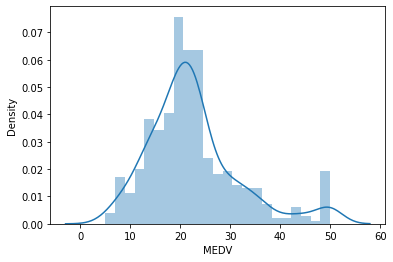

In [8]:
#visualiation

import seaborn as sns
sns.distplot(boston.MEDV)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

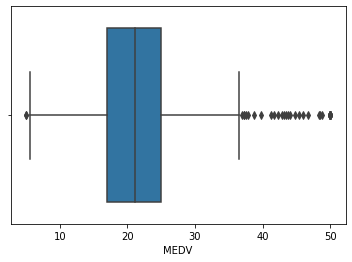

In [9]:
sns.boxplot(boston.MEDV)

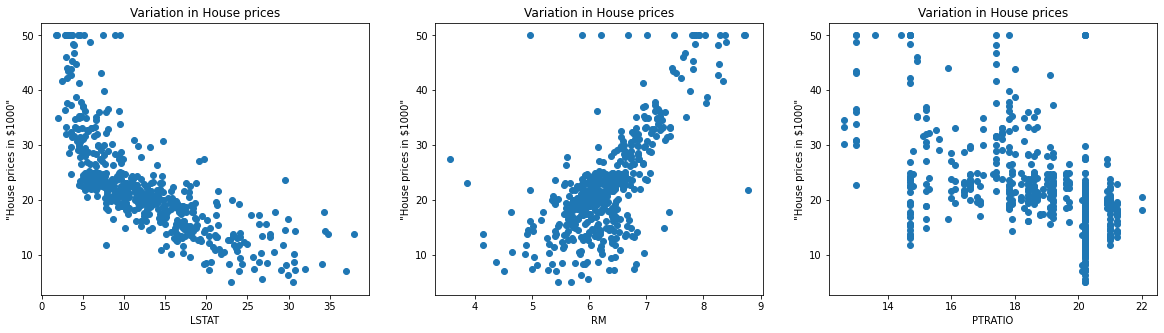

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = boston.MEDV
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [11]:
#Splitting the dependent feature and independent feature
X = boston.iloc[:, :-1].values
y = boston.iloc[:, -1].values

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(units=10, input_shape=(X_train.shape[1],), activation='relu'),
#    tf.keras.layers.Dense(units=1)
#])
from keras.models import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(units=10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(units=1))

In [40]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')


In [41]:
# Train the model
#history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=100,validation_split=0.1)


Epoch 1/100
12/12 [==============================] - 1s 27ms/step - loss: 3534.1074 - val_loss: 1576.9579
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 1302.1816 - val_loss: 536.0579
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 422.3973 - val_loss: 186.8436
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 152.6750 - val_loss: 115.1524
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 109.4697 - val_loss: 120.1943
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 103.1768 - val_loss: 105.7820
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 94.2275 - val_loss: 102.7972
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 96.2640 - val_loss: 104.0059
Epoch 9/100
12/12 [==============================] - 0s 10ms/step - loss: 84.3247 - val_loss: 91.3885
Epoch 10/100
12/12 [==============================] - 0s 9ms/step - l

12/12 [==============================] - 0s 9ms/step - loss: 39.0358 - val_loss: 54.0596
Epoch 82/100
12/12 [==============================] - 0s 8ms/step - loss: 39.0201 - val_loss: 53.5825
Epoch 83/100
12/12 [==============================] - 0s 7ms/step - loss: 40.3085 - val_loss: 54.2741
Epoch 84/100
12/12 [==============================] - 0s 10ms/step - loss: 43.1471 - val_loss: 59.2769
Epoch 85/100
12/12 [==============================] - 0s 9ms/step - loss: 44.2301 - val_loss: 53.7239
Epoch 86/100
12/12 [==============================] - 0s 9ms/step - loss: 42.7554 - val_loss: 55.1563
Epoch 87/100
12/12 [==============================] - 0s 8ms/step - loss: 44.8067 - val_loss: 74.4522
Epoch 88/100
12/12 [==============================] - 0s 8ms/step - loss: 41.5848 - val_loss: 54.5100
Epoch 89/100
12/12 [==============================] - 0s 10ms/step - loss: 39.7953 - val_loss: 55.3533
Epoch 90/100
12/12 [==============================] - 0s 8ms/step - loss: 39.0025 - val_loss:

In [42]:
# Evaluate the performance of the model on the test data
mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Mean Squared Error: {mse:0.3f}')

Test Mean Squared Error: 39.222


In [43]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.4651533491482206


In [45]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

6.262773213009502
